In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn as skl
import matplotlib.pyplot as plt
import time

In [2]:
data =pd.read_csv('Crop_recommendation.csv')
data.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [3]:
#Shape of Dataset
print('Shape of Dataset : ',data.shape)

Shape of Dataset :  (2200, 8)


In [4]:
data.describe()


,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [5]:
data.nunique()


N               137
P               117
K                73
temperature    2200
humidity       2200
ph             2200
rainfall       2200
label            22
dtype: int64

In [6]:
#Check Miising Values
data.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [7]:
#Check Crops in Dataset
data['label'].value_counts()

rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: label, dtype: int64

c:\users\satye\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\users\satye\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\users\satye\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will re

Text(0.5, 0, 'Rainfall')

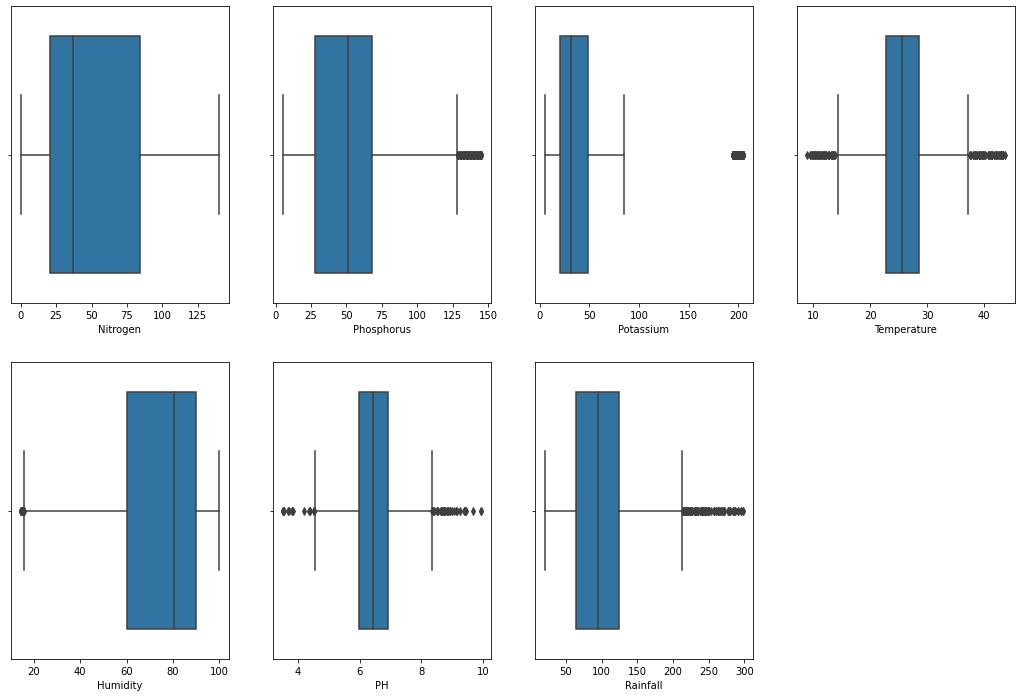

In [8]:
fig_dims = (18, 12)
fig, ax = plt.subplots(figsize=fig_dims)

plt.subplot(2,4,1)
sns.boxplot(data['N'])
plt.xlabel('Nitrogen')

plt.subplot(2,4,2)
sns.boxplot(data['P'])
plt.xlabel('Phosphorus')

plt.subplot(2,4,3)
sns.boxplot(data['K'])
plt.xlabel('Potassium')

plt.subplot(2,4,4)
sns.boxplot(data['temperature'])
plt.xlabel('Temperature')

plt.subplot(2,4,5)
sns.boxplot(data['humidity'])
plt.xlabel('Humidity')

plt.subplot(2,4,6)
sns.boxplot(data['ph'])
plt.xlabel('PH')

plt.subplot(2,4,7)
sns.boxplot(data['rainfall'])
plt.xlabel('Rainfall')

In [9]:
#Check Summary for all Crops
print('Average Ratio of Nitrogen in the soil : {0:.2f}'.format(data['N'].mean()))
print('Average Ratio of Phosphorous in the soil : {0:.2f}'.format(data['P'].mean()))
print('Average Ratio of Potassium in the soil : {0:.2f}'.format(data['K'].mean()))
print('Average Temperature in Celsius : {0:.2f}'.format(data['temperature'].mean()))
print('Average Ratio of Humidity in the soil : {0:.2f}'.format(data['humidity'].mean()))
print('Average PH value of the soil : {0:.2f}'.format(data['ph'].mean()))
print('Average Rainfall in mm : {0:.2f}'.format(data['rainfall'].mean()))

Average Ratio of Nitrogen in the soil : 50.55
Average Ratio of Phosphorous in the soil : 53.36
Average Ratio of Potassium in the soil : 48.15
Average Temperature in Celsius : 25.62
Average Ratio of Humidity in the soil : 71.48
Average PH value of the soil : 6.47
Average Rainfall in mm : 103.46


c:\users\satye\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\satye\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\satye\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either 

Text(0.5, 0, 'Rainfall')

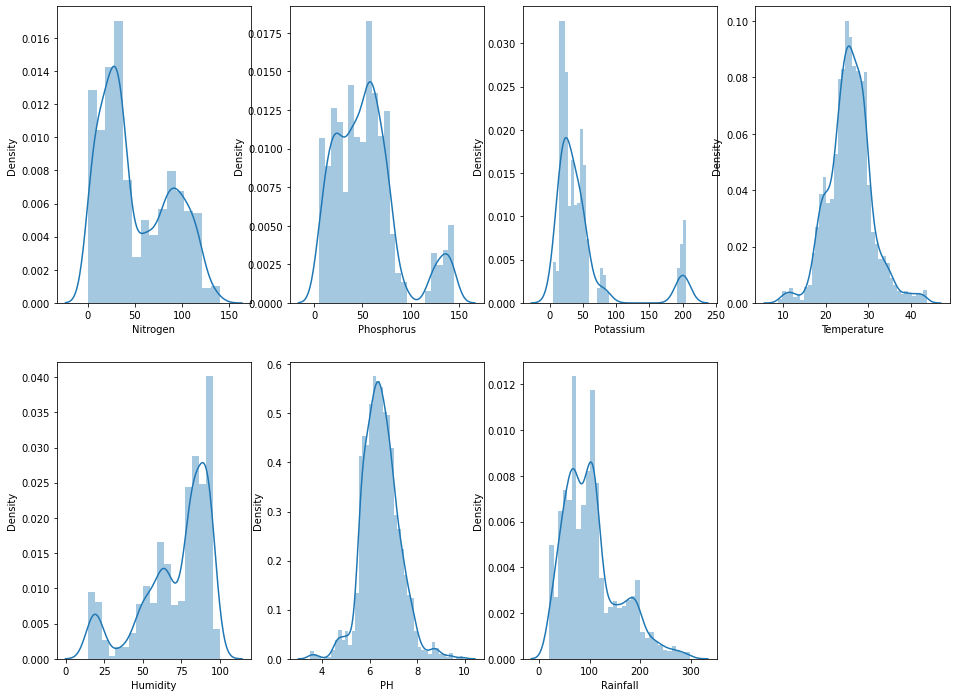

In [10]:
#Distribution of Agriculture Conditions

fig_dims = (16, 12)
fig, ax = plt.subplots(figsize=fig_dims)

plt.subplot(2,4,1)
sns.distplot(data['N'])
plt.xlabel('Nitrogen')

plt.subplot(2,4,2)
sns.distplot(data['P'])
plt.xlabel('Phosphorus')

plt.subplot(2,4,3)
sns.distplot(data['K'])
plt.xlabel('Potassium')

plt.subplot(2,4,4)
sns.distplot(data['temperature'])
plt.xlabel('Temperature')

plt.subplot(2,4,5)
sns.distplot(data['humidity'])
plt.xlabel('Humidity')

plt.subplot(2,4,6)
sns.distplot(data['ph'])
plt.xlabel('PH')

plt.subplot(2,4,7)
sns.distplot(data['rainfall'])
plt.xlabel('Rainfall')

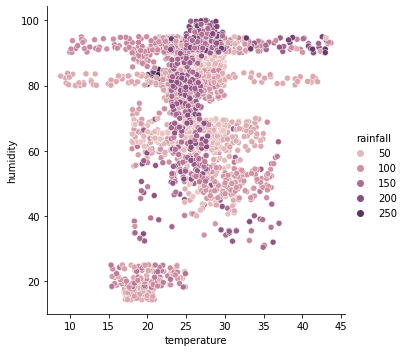

In [11]:
sns.relplot(x='temperature', y='humidity' , hue='rainfall' ,data=data)

In [12]:
#Season wise Crops

print('\n')
print('Summer Crops')
print(data[(data.temperature > 30) & (data.humidity > 50)]['label'].unique())
print('\n')
print('Winter Crops')
print(data[(data.temperature < 20) & (data.humidity > 30)]['label'].unique())
print('\n')
print('Rainy Crops')
print(data[(data.rainfall > 200) & (data.humidity > 30)]['label'].unique())



Summer Crops
['pigeonpeas' 'mothbeans' 'blackgram' 'mango' 'grapes' 'orange' 'papaya']


Winter Crops
['maize' 'pigeonpeas' 'lentil' 'pomegranate' 'grapes' 'orange']


Rainy Crops
['rice' 'papaya' 'coconut']


In [13]:
#to make Groups we use KMeans Clustering Algorithm

from sklearn.cluster import KMeans

#removing the labels column
x = data.drop(['label'],axis=1)

#Selecting all the values of the data
x = x.values

#Checking the Shape
x.shape

(2200, 7)

In [14]:
#Lets implement the K Means algorithm to perform Clustering analysis


kn = KMeans(n_clusters = 4, init = 'k-means++', max_iter = 300, n_init = 10)
y_means = kn.fit_predict(x)

#Results

a = data['label']
y_means = pd.DataFrame(y_means)

z = pd.concat([y_means, a], axis = 1)
z = z.rename(columns = {0:'cluster'})


#Lets Check the Cluster of each Crop

print("Lets Check the Results After applying the K Means Clustering Analysis \n")
print("Crops in First Cluster:",z[z['cluster'] == 0]['label'].unique())
print('\n')
print("Crops in Second Cluster:",z[z['cluster'] == 1]['label'].unique())
print('\n')
print("Crops in Third Cluster:",z[z['cluster'] == 2]['label'].unique())
print('\n')
print("Crops in Fourth Cluster:",z[z['cluster'] == 3]['label'].unique())

Lets Check the Results After applying the K Means Clustering Analysis 

Crops in First Cluster: ['maize' 'chickpea' 'kidneybeans' 'pigeonpeas' 'mothbeans' 'mungbean'
 'blackgram' 'lentil' 'pomegranate' 'mango' 'orange' 'papaya' 'coconut']


Crops in Second Cluster: ['grapes' 'apple']


Crops in Third Cluster: ['maize' 'banana' 'watermelon' 'muskmelon' 'papaya' 'cotton' 'coffee']


Crops in Fourth Cluster: ['rice' 'pigeonpeas' 'papaya' 'coconut' 'jute' 'coffee']


In [15]:
#Corelation
data.corr()

,N,P,K,temperature,humidity,ph,rainfall
N,1.000000,-0.231460,-0.140512,0.026504,0.190688,0.096683,0.059020
P,-0.231460,1.000000,0.736232,-0.127541,-0.118734,-0.138019,-0.063839
K,-0.140512,0.736232,1.000000,-0.160387,0.190859,-0.169503,-0.053461
temperature,0.026504,-0.127541,-0.160387,1.000000,0.205320,-0.017795,-0.030084
humidity,0.190688,-0.118734,0.190859,0.205320,1.000000,-0.008483,0.094423
ph,0.096683,-0.138019,-0.169503,-0.017795,-0.008483,1.000000,-0.109069
rainfall,0.059020,-0.063839,-0.053461,-0.030084,0.094423,-0.109069,1.000000


<AxesSubplot:>

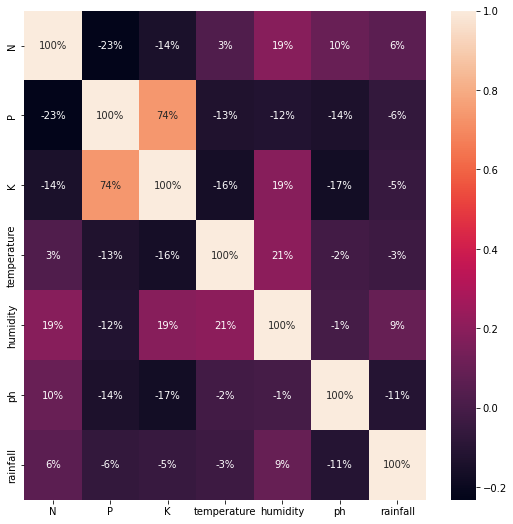

In [16]:
#Visualize Correlation

plt.figure(figsize=(9,9))
sns.heatmap(data.corr(), annot =True, fmt= '.0%', )

In [17]:
c=data.label.astype('category')
#print(c)
targets = dict(enumerate(c.cat.categories))
#print(targets)
data['target']=c.cat.codes
#print(data.head())
y=data.target
X=data[['N','P','K','temperature','humidity','ph','rainfall']]
X.head()

,N,P,K,temperature,humidity,ph,rainfall
0,90,42,43,20.879744,82.002744,6.502985,202.935536
1,85,58,41,21.770462,80.319644,7.038096,226.655537
2,60,55,44,23.004459,82.320763,7.840207,263.964248
3,74,35,40,26.491096,80.158363,6.980401,242.864034
4,78,42,42,20.130175,81.604873,7.628473,262.717340


In [18]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=1)

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)

# we must apply the scaling to the test set as well that we are computing for the training set
X_test_scaled = scaler.transform(X_test)

In [19]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train_scaled, y_train)
knn.score(X_test_scaled, y_test)

0.9781818181818182

<AxesSubplot:>

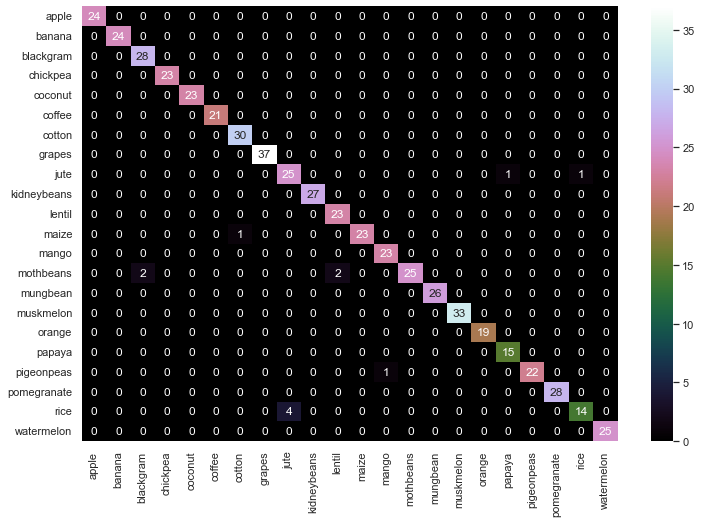

In [20]:
from sklearn.metrics import confusion_matrix
mat=confusion_matrix(y_test,knn.predict(X_test_scaled))
df_cm = pd.DataFrame(mat, list(targets.values()), list(targets.values()))
sns.set(font_scale=1.0) # for label size
plt.figure(figsize = (12,8))
sns.heatmap(df_cm, annot= True, annot_kws={"size": 12},cmap="cubehelix", linecolor='white')